In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
# 点云读取
pointcloud = np.fromfile(str("000293.bin"), dtype=np.float32, count=-1).reshape([-1, 4])
# 设置鸟瞰图范围
side_range = (-40, 40)  # 左右距离
fwd_range = (0, 70.4)  # 后前距离
 
x_points = pointcloud[:, 0]
y_points = pointcloud[:, 1]
z_points = pointcloud[:, 2]
 
# 获得区域内的点
f_filt = np.logical_and(x_points > fwd_range[0], x_points < fwd_range[1])
s_filt = np.logical_and(y_points > side_range[0], y_points < side_range[1])
filter = np.logical_and(f_filt, s_filt)
indices = np.argwhere(filter).flatten()
x_points = x_points[indices]
y_points = y_points[indices]
z_points = z_points[indices]
 
res = 0.1  # 分辨率0.05m
x_img = (-y_points / res).astype(np.int32)
y_img = (-x_points / res).astype(np.int32)
# 调整坐标原点
x_img -= int(np.floor(side_range[0]) / res)
y_img += int(np.floor(fwd_range[1]) / res)
print(x_img.min(), x_img.max(), y_img.min(), x_img.max())
 
# 填充像素值
height_range = (-2, 0.5)
pixel_value = np.clip(a=z_points, a_max=height_range[1], a_min=height_range[0])
 
def scale_to_255(a, min, max, dtype=np.uint8):
    return ((a - min) / float(max - min) * 255).astype(dtype)
 
pixel_value = scale_to_255(pixel_value, height_range[0], height_range[1])
 
# 创建图像数组
x_max = 1 + int((side_range[1] - side_range[0]) / res)
y_max = 1 + int((fwd_range[1] - fwd_range[0]) / res)
im = np.zeros([y_max, x_max], dtype=np.uint8)
im[y_img, x_img] = pixel_value

3 798 -2 798


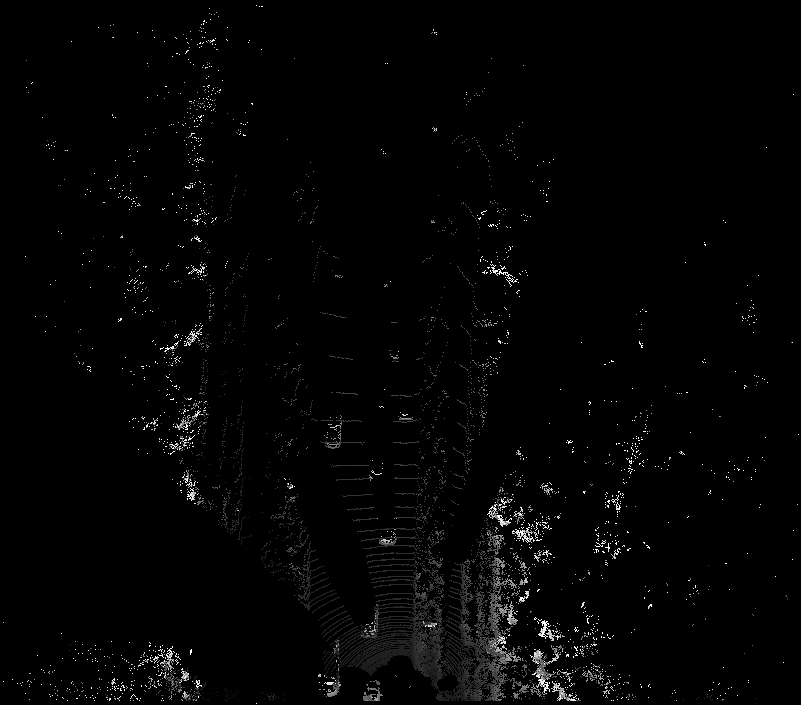

In [11]:
im2 = Image.fromarray(im)
im2

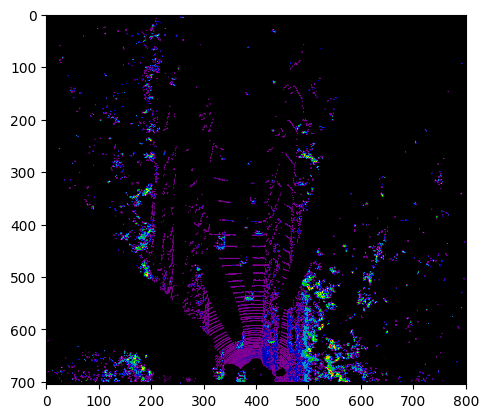

In [10]:
# imshow （彩色）
plt.imshow(im, cmap="nipy_spectral", vmin=0, vmax=255)
plt.show()